## Depression Identification

In [1]:
import pandas as pd
import numpy as np

# Our data is cleaned by cleaning utility code
df = pd.read_csv('Clean_Data_Adults_1.csv')

In [2]:
# Separate labels and Features
df_labels = df['Depressed']
df_feats = df.drop(['Depressed', 'Unnamed: 0'], axis=1, inplace=False)

X = df_feats.get_values()  # features
y = df_labels.get_values() # labels

In [3]:
'''
Get rid of the negative values of the race_id columns
W.L.O.G., subtract the minimum negative from the entire column 
'''
def clean_negs(X):
    # Get indices of columns that contain negative values
    neg_col_inds = np.unique(np.where(X<0)[1])

    # Subtract minimum negative for each column
    for neg_i in neg_col_inds:
        neg_col = X[:, neg_i]
        min_neg = np.min(neg_col)
        new_col = [c - min_neg for c in neg_col] 
        X[:, neg_i] = new_col
        
    return X

In [4]:
# Preprocess training features
X = clean_negs(X)

## 1. State assumptions about your data

- X are i.i.d. random variables.
- y ~ Bern(p)

## 2. Formally define classification problem

Feature matrix X: R<sup>n x m</sup>

Each sample X<sub>i</sub> ∈ R<sup>m</sup>, i ∈ [1, n]

Label y<sub>i</sub> ∈ {0, 1}, i ∈ [1, n]

g(X) → y

G := { g: R → {0, 1} }

Goal: g<sup>*</sup> = argmin<sub>g ∈ G</sub> E[L(g(X), y)], where L denotes loss function.


The loss function L differs for different classifiers and is speficied in the classfication context below:

- Multinomial Naive Bayes: negative joint likelihood

    - L = -log p(X, y)
    
    
- Logistic Regression:  logistic loss (cross-entropy loss)

    - L = -log P(y|g(X)) = -(y · log(g(X)) + (1 - y) · log(1 - g(X))


- K Nearest Neighbors

    - L = ∑<sub>i</sub> D(X<sub>i</sub>|y<sub>i</sub>=1, X|y=1) + ∑<sub>i</sub> D(X<sub>i</sub>|y<sub>i</sub>=0, X|y=0)
    
    - D(a, b) = (a - b)<sup>2</sup>


- Support Vector Machine: squared hinge loss

    - L = (max{0, 1 − y · g(x)})<sup>2</sup>


- Random Forest

    - L = ∑<sub>i</sub> (g(X<sub>i</sub>) - y<sub>i</sub>)<sup>2</sup>
    


## 3. Provide algorithm for solving problem (including choosing hyperparameters as appropriate)

- Multinomial Naive Bayes

    - alpha: default =1.0 (Laplace smoothing parameter)
    
    - fit_prior: default = True (learn class prior probabilities)
    
    
- Logistic Regression

    - penalty = 'l1' (l1 norm for penalization)


- K Nearest Neighbors

    - n_neighbors = 10


- Support Vector Machine (Linear Kernel)
    
    - C: default = 1.0 (penalty parameter of the error term)
    

- Random Forest
    
    - n_estimators = 60 (number of trees)
    
    - criterion: default = 'gini'


## 4. Sample data from a simulation setting inspired by your data 

In [5]:
'''
Data Preparation
'''
from sklearn.cross_validation import train_test_split

# Split the simulated data into training set and test set
# Randomly sample 20% data as the test set
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

print 'Training set size is', train_X.shape
print 'Testing set size is', test_X.shape

max_n = len(train_X)

Training set size is (2236, 735)
Testing set size is (560, 735)


In [6]:
# Train the given classifier
def train_clf(clf, train_feats, train_labels):
    # Supervised training
    clf.fit(train_feats, train_labels)
    
# Test the given classifier anc calculate accuracy
def test_clf(clf, test_feats, test_labels):
    # Predict using test set
    predicted = clf.predict(test_feats)
    # Compute accuracy
    acc = np.mean(predicted == test_labels)
    return predicted, acc

## 5. Compute accuracy

In [8]:
# Compute accuracy of a model trained with a specific number of samples
def compute_acc(clf, n):
    train_clf(clf, train_X[:n], train_y[:n])
    predict_y, acc = test_clf(clf, test_X, test_y)
    return acc

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

[acc_NB, acc_LG, acc_KNN, acc_SVM, acc_RF] = [[]  for i in xrange(5)] 

for n in xrange(100, max_n, 100):
    # Multinomial Naive Bayes
    multiNB = MultinomialNB()
    acc_NB.append(compute_acc(multiNB, n))
    
    # Logistic Regression
    lg = LogisticRegression(penalty='l1')
    acc_LG.append(compute_acc(lg, n))
    
    # K Nearest Neighbors
    knn = KNeighborsClassifier(n_neighbors=10)
    acc_KNN.append(compute_acc(knn, n))
    
    # Support Vector Machine
    svc = LinearSVC()
    acc_SVM.append(compute_acc(svc, n)) 
    
    # Random Forest
    rf = RandomForestClassifier(n_estimators=60) 
    acc_RF.append(compute_acc(rf, n))

## 6. Plot accuracy vs. sample size in simulation

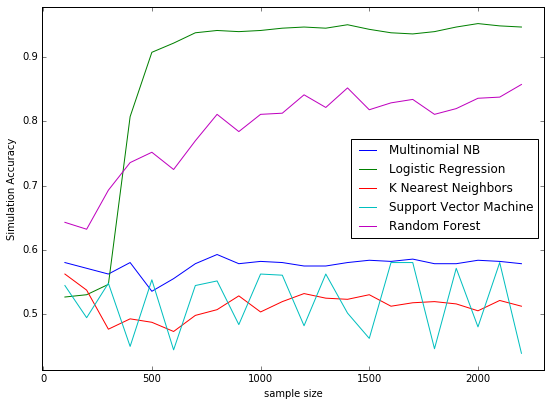

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

sizes = range(100, max_n, 100)

fig = plt.figure(1)
fig.set_size_inches(9, 6.5)

plt.plot(sizes, acc_NB, label='Multinomial NB')
plt.plot(sizes, acc_LG, label='Logistic Regression')
plt.plot(sizes, acc_KNN, label='K Nearest Neighbors')
plt.plot(sizes, acc_SVM, label='Support Vector Machine')
plt.plot(sizes, acc_RF, label='Random Forest')

plt.legend(loc='best')
plt.xlabel('sample size')
plt.ylabel('Simulation Accuracy')

## 7. Apply method directly on real data 

In [13]:
'''
Train models with all the training data
Evaluate using the test data
'''
# Multinomial Naive Bayes
multiNB = MultinomialNB()
train_clf(multiNB, train_X, train_y)
predict_y, acc_nb = test_clf(multiNB, test_X, test_y)

# Logistic Regression
lg = LogisticRegression(penalty='l1')
train_clf(lg, train_X, train_y)
predict_y, acc_lg = test_clf(lg, test_X, test_y)

# K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)
train_clf(knn, train_X, train_y)
predict_y, acc_knn = test_clf(knn, test_X, test_y)

# Support Vector Machine
svc = LinearSVC()
train_clf(svc, train_X, train_y)
predict_y, acc_svc = test_clf(svc, test_X, test_y)

# Random Forest
rf = RandomForestClassifier(n_estimators=60)
train_clf(rf, train_X, train_y)
predict_y, acc_rf = test_clf(rf, test_X, test_y)

In [14]:
print 'Multinomial Naive Bayes accuracy is', acc_nb
print 'Logistic Regression accuracy is', acc_lg
print 'K Nearest Neighbors accuracy is', acc_knn
print 'Support Vector Machine (Linear Kernel) accuracy is', acc_svc
print 'Random Forest accuracy is', acc_rf

Multinomial Naive Bayes accuracy is 0.582142857143
Logistic Regression accuracy is 0.946428571429
K Nearest Neighbors accuracy is 0.5125
Support Vector Machine (Linear Kernel) accuracy is 0.564285714286
Random Forest accuracy is 0.832142857143


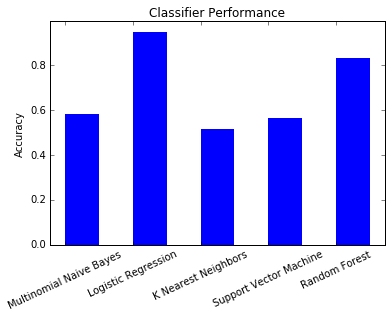

In [16]:
# Visualize classifier performance
x = range(5)
y = [acc_nb, acc_lg, acc_knn, acc_svc, acc_rf]
clf_names = ['Multinomial Naive Bayes', 'Logistic Regression', \
             'K Nearest Neighbors', 'Support Vector Machine', 'Random Forest']

width = 0.6/1.2
plt.bar(x, y, width)

plt.title('Classifier Performance')
plt.xticks(x, clf_names, rotation=25)
plt.ylabel('Accuracy')

## 8. Explain the degree to which you believe the result and why

Since this experiment is conducted on the real data, and the data size is relatively large, I think we can trust the result to a certain extent. We use random splitting instead of k-fold cross-validation because we have enough samples and cross-validation is computationally expensive.

The best classification accuracy on the test set is 94.6%, yielded by the logistic regression classifier. Both logistic regression and random forest yielded fair results. In particular, logistic regression converges really fast, as shown in the accuracy curve. 

Logistic regression has low variance and less prone to overfit the data. Its high predication accuracy indicates that we might be able to find a single linear boundary that correctly separate the majority of our data.

Random forest deals well with skewed data, but it can overfit the training data. If we can remove more noise from the training data, theoretically random forest would perform better.

Naive Bayes makes conditional independence assumption, it failed to capture the correlation between our features, whereas a lot of disorder or symptom features are concurrent.

KNN computes distances between samples to determine which class a sample belongs to. It does not capture the importance of each feature. From the result of KNN we can conclude that we should not use a non-parametric method to analyze our data.

The performance of SVM is really poor, because our data might be skewed, since it contains so much information, and can be divided into subsets and trained in parallel (e.g. individual information, questionare data, RBF data). Also our dataset has a large number of features compared to the number of samples, SVM is inefficient in such senario.

Next, we want to look into the correlation of the features and figure out how to properly simulate the distribution of the real data.